In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('placements.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [3]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

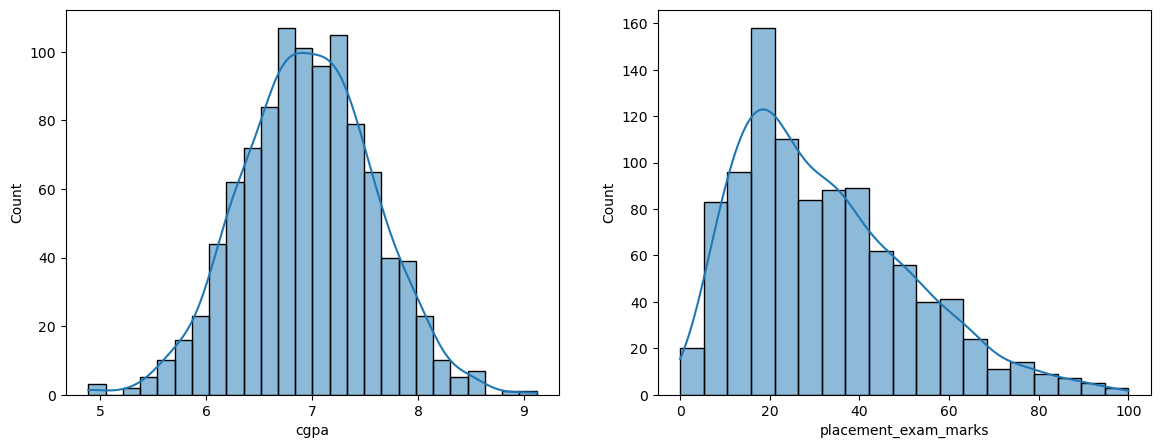

In [7]:
fig , (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

sns.histplot(df['cgpa'],kde=True,ax=ax1)
sns.histplot(df['placement_exam_marks'],kde=True,ax=ax2)
# cgpa follows normal distribution -> we can apply zscore method

In [11]:

lower_lmt = df['cgpa'].mean()-3*df['cgpa'].std()
upper_lmt = df['cgpa'].mean()+3*df['cgpa'].std()

In [12]:
# outiers are
df[(df['cgpa']<lower_lmt) | (df['cgpa']>upper_lmt)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### trimming

In [13]:
new_df_trimmed = df[(df['cgpa']>lower_lmt) & (df['cgpa']<upper_lmt)]
new_df_trimmed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### capping

In [15]:
df['cgpa'] = np.where(
    df['cgpa']>upper_lmt,
    upper_lmt,
    np.where(
        df['cgpa']<lower_lmt,
        lower_lmt,
        df['cgpa']
    )
)

In [16]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


### oulier detection by z-score

In [19]:
df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [20]:
# ouliers in data
df[(df['cgpa_zscore'] < -3) | (df['cgpa_zscore'] > 3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,5.113546,44.0,1,-3.016137
995,8.808934,44.0,1,3.015293
996,8.808934,65.0,1,3.015293
997,5.113546,34.0,0,-3.016137
999,5.113546,10.0,1,-3.016137


In [22]:
# remove of ouliers detected by zscore
new_df_trimmed = df[(df['cgpa_zscore']>-3) & (df['cgpa_zscore']<3)]
new_df_trimmed

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.372949
1,7.46,38.0,1,0.813630
2,7.54,40.0,1,0.944202
3,6.42,8.0,1,-0.883807
4,7.23,17.0,0,0.438235
...,...,...,...,...
991,7.04,57.0,0,0.128126
992,6.26,12.0,0,-1.144952
993,6.73,21.0,1,-0.377841
994,6.48,63.0,0,-0.785878


In [ ]:
print('jana')

In [1]:
print("jana")

jana
